## Reproject, Resample, Clip Raster Data with GDAL

Refer to the documentation of `gdal.WarpOptions` for more details about processing options.

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [12]:
dem_path = 'data/dem/north_mexico_clip.tif'
reproj_output_path = 'output/north_mexico_reprojected.tif'

In [3]:
ds = gdal.Open(dem_path)
dem = ds.GetRasterBand(1).ReadAsArray()

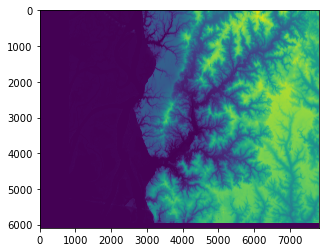

In [7]:
plt.figure()
plt.imshow(dem, vmin=0, vmax=80)
plt.show()

In [8]:
print(ds.GetGeoTransform())
print(ds.GetProjection())

(978102.0, 3.0, 0.0, 3420441.0, 0.0, -3.0)
PROJCS["NAD83 / UTM zone 15N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26915"]]


In [9]:
x_origin, pixel_width, row_rotation, y_origin, column_rotation, pixel_height = ds.GetGeoTransform()

In [10]:
print(f'Top left coordinate: {x_origin}, {y_origin}')
print(f'Pixel size (m): {pixel_width} x {-pixel_height}')
print(f'Column and Row Rotation: {column_rotation} X, {row_rotation} Y')

Top left coordinate: 978102.0, 3420441.0
Pixel size (m): 3.0 x 3.0
Column and Row Rotation: 0.0 X, 0.0 Y


##### Reproject (Warp)

In [18]:
warp_options = {
    'dstSRS': 'EPSG:3857',
    'xRes': pixel_width * 2,
    'yRes': -pixel_height * 2,
    'resampleAlg': 'bilinear'
}
reproj_ds = gdal.Warp(reproj_output_path, ds, **warp_options)

##### Resample

In [19]:
resample_options = {
    'xRes': pixel_width * 10,
    'yRes': -pixel_height * 10,
    'resampleAlg': 'bilinear'
}
resample_output = reproj_output_path.replace('reprojected', 'resampled')
resampled_ds = gdal.Warp(resample_output, ds, **resample_options)

##### Clip

In [25]:
clip_options = {
    'cutlineDSName': 'data/dem/northern_mexico_clip_mask.shp' ,
    'cropToCutline': True,
    'dstNodata': np.nan
}

clipped_output = reproj_output_path.replace('reprojected', 'clipped')
clipped_ds = gdal.Warp(clipped_output, ds, **clip_options)

In [32]:
def plot_dataset(dataset, band=1, vmin=0, vmax=80, cmap='viridis'):
    array = dataset.GetRasterBand(band).ReadAsArray()
    plt.figure()
    plt.imshow(array, vmin=vmin, vmax=vmax, cmap=cmap)
    
def close_dataset(dataset):
    dataset = None

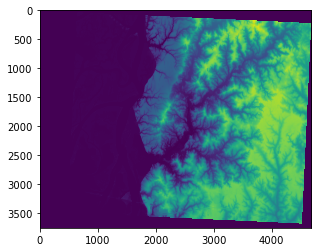

In [33]:
plot_dataset(reproj_ds)

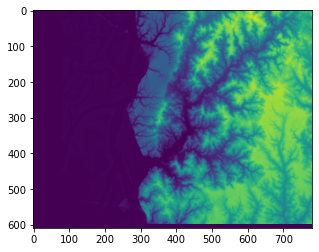

In [35]:
plot_dataset(resampled_ds)

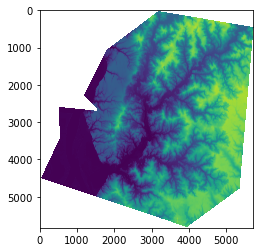

In [36]:
plot_dataset(clipped_ds)

In [37]:
close_dataset(reproj_ds)
close_dataset(resampled_ds)
close_dataset(clipped_ds)